# **Parkinson's disease Prediction based on voice recording**

# **Data Description and Context**:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased. Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

# **Domain:**
Medicine

# **Attribute Information:**
*  name - ASCII subject name and recording number 
*  MDVP:Fo(Hz) - Average vocal fundamental frequency 
*  MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
*  MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
*  MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
   measures of variation in fundamental frequency 
*  MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 

*   NHR,HNR - Two measures of ratio of noise to tonal components in the voice
*   status - Health status of the subject (one) - Parkinson's, (zero) - healthy
*   RPDE,D2 - Two nonlinear dynamical complexity measures
*   DFA - Signal fractal scaling exponent
*   spread1,spread2,PPE - Three nonlinear measures of fundamental frequency    variation

# **Objective**:
Goal is to classify the patients into the respective labels using the attributes from their voice recordings

## Importing libraries

In [112]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data into dataframe

In [113]:
df=pd.read_csv("/content/datasets_410614_786211_parkinsons.csv")

In [114]:
df.shape

(195, 24)

### We have a total of 24 features and 195 rows of data

In [115]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [116]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [117]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# **Exploratry Data Analysis**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Statistical Summary of features 

In [119]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# **Missing** **Values** 

In [120]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### **Observations**: From above we can observe that there are no null values

# check for duplicate value

In [121]:
df.duplicated().sum()

0

In [122]:
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

## Hence we can conclude that there is no duplicate values

In [123]:
# name contain string type data we dont need it so we drop it
df.drop(['name'], axis = 1,inplace=True)

# **Univariate Analysis**

## plots to analyse impact of continous variables on status

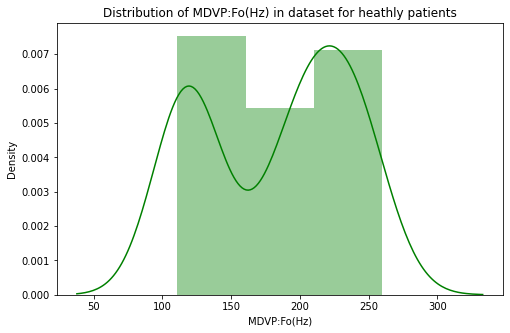

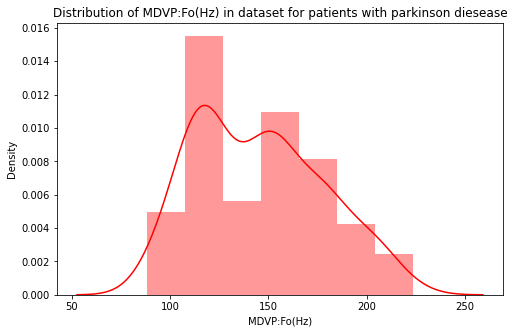

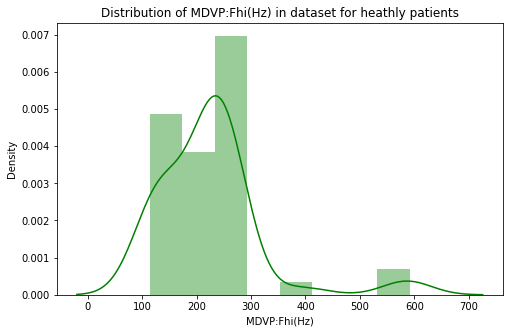

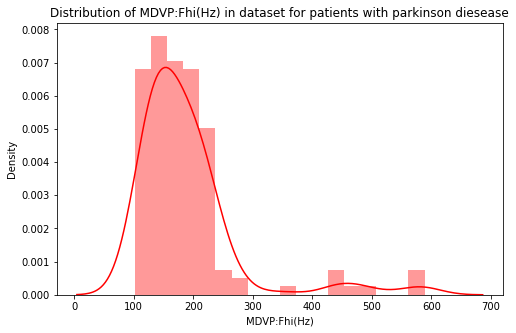

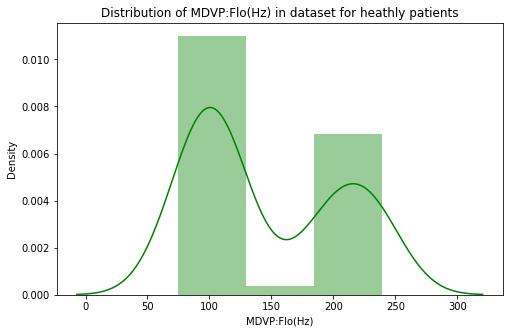

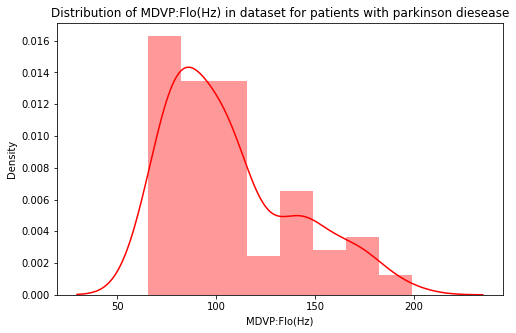

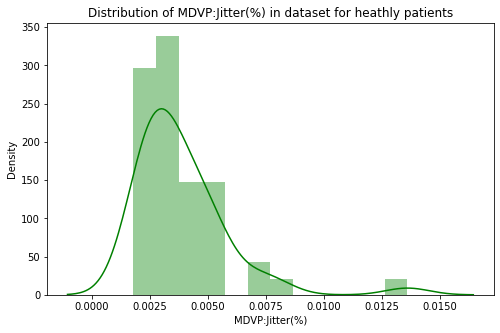

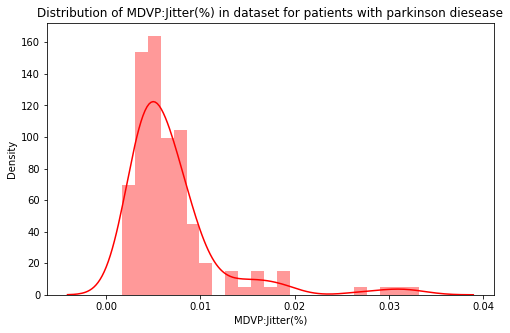

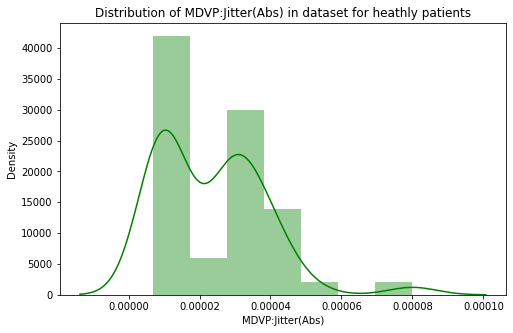

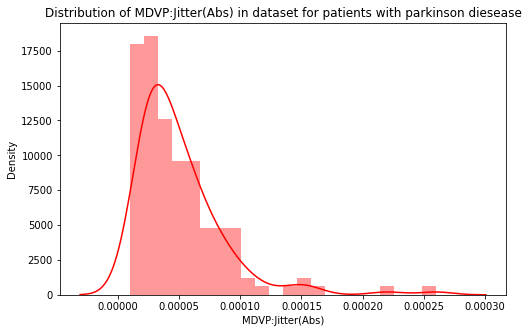

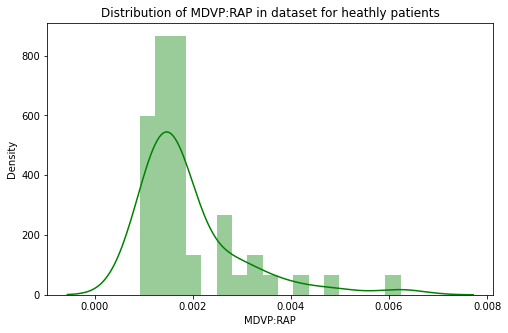

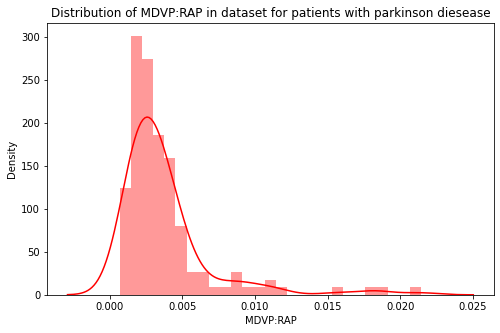

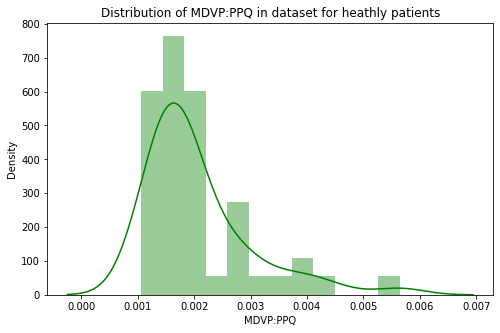

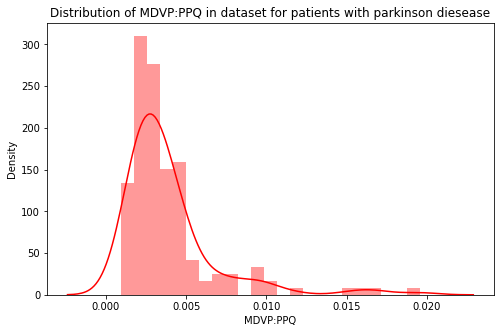

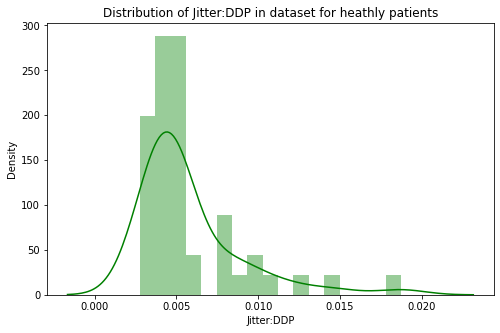

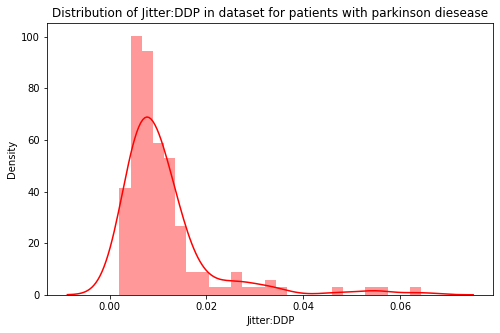

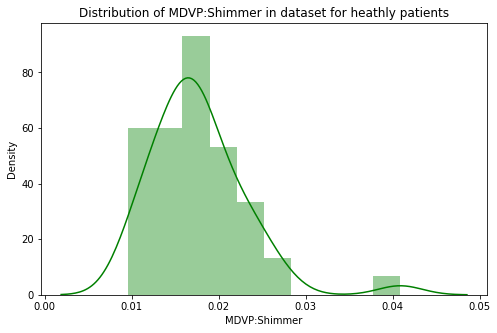

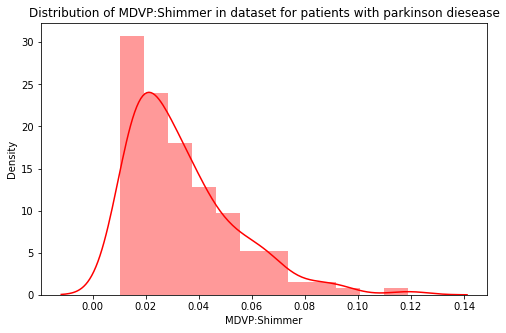

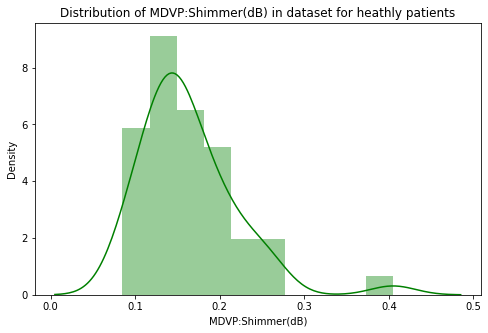

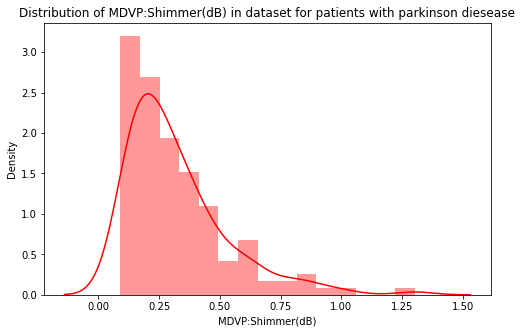

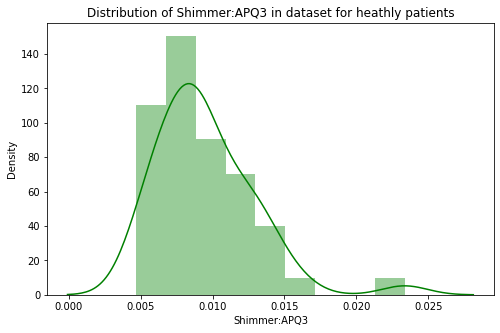

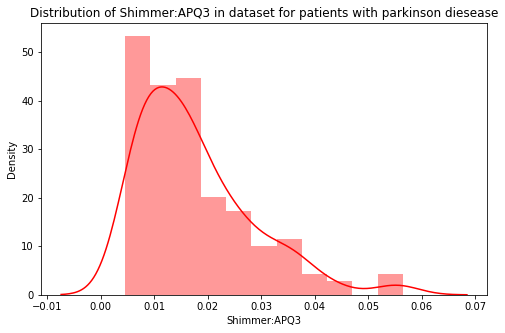

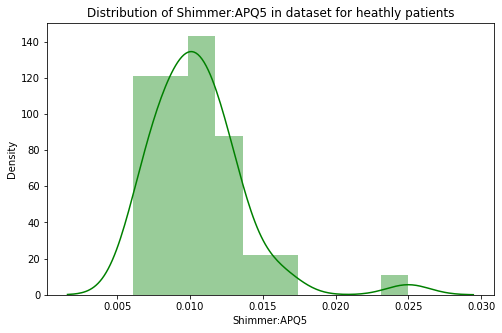

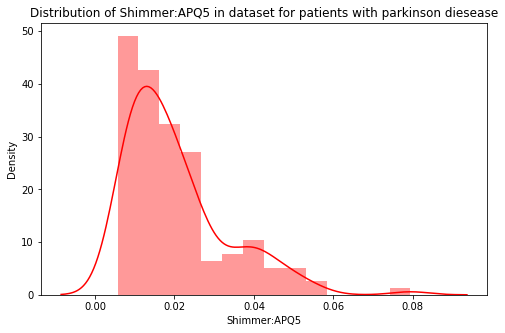

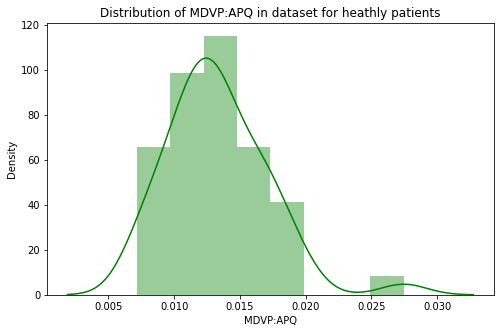

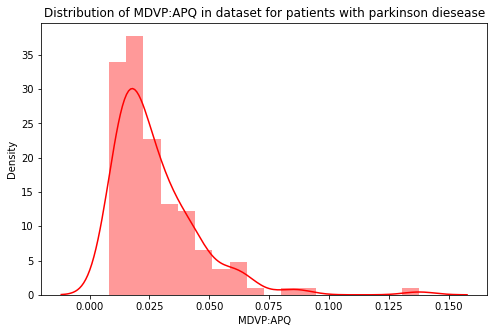

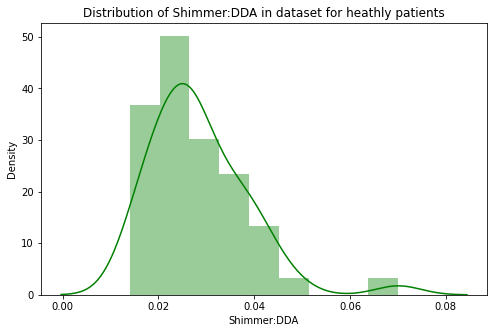

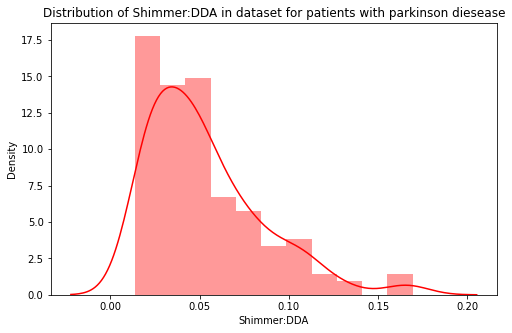

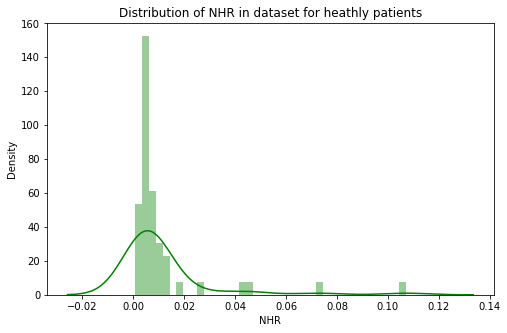

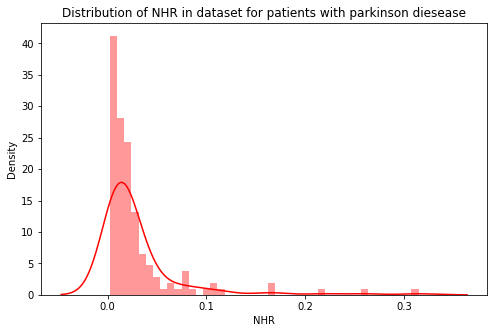

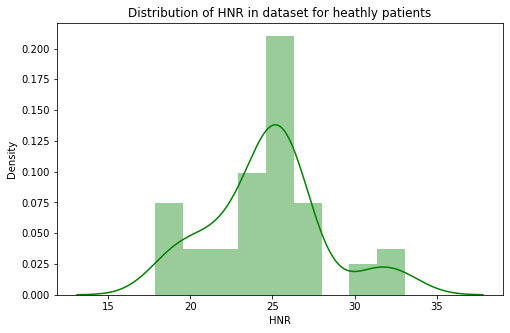

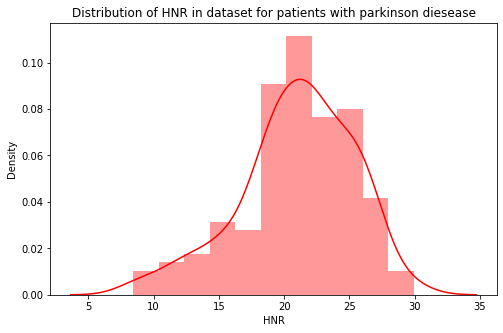

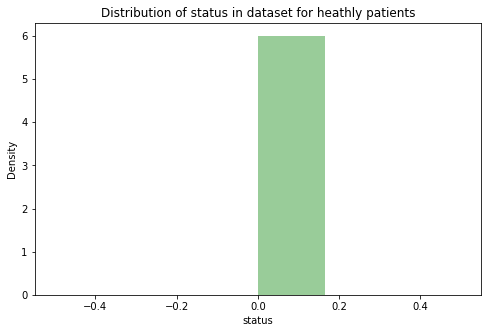

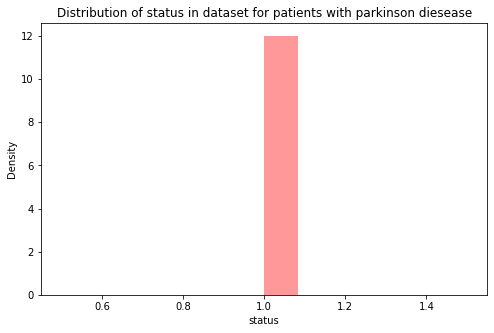

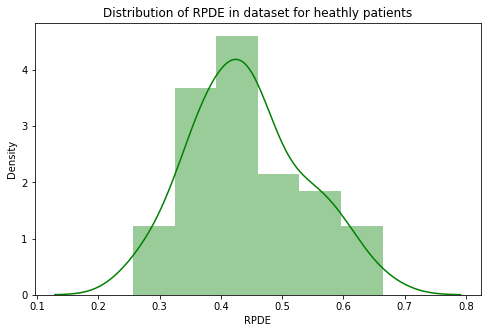

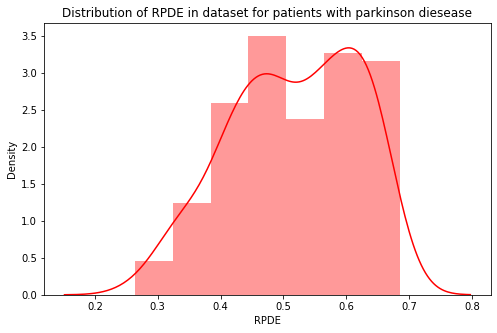

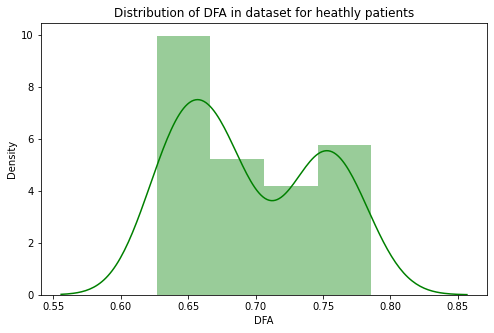

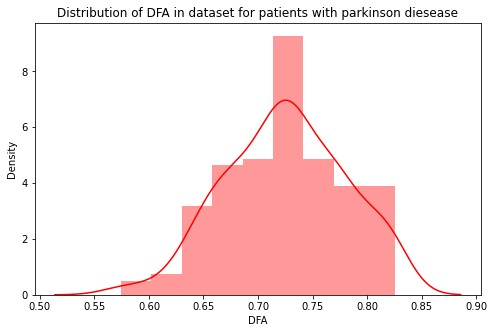

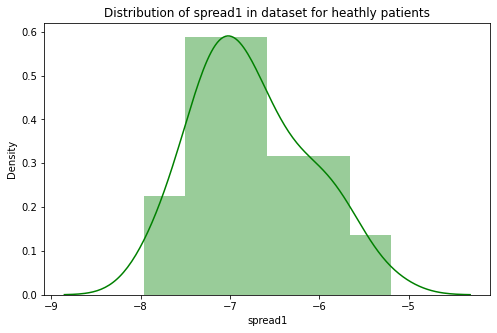

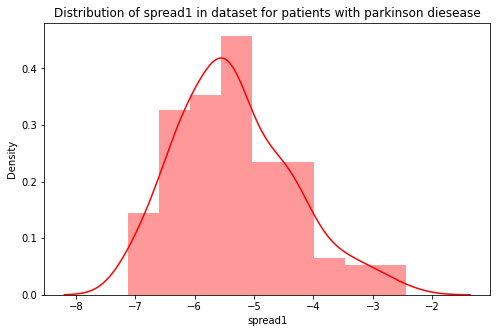

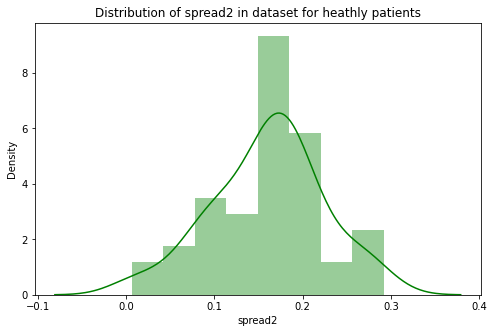

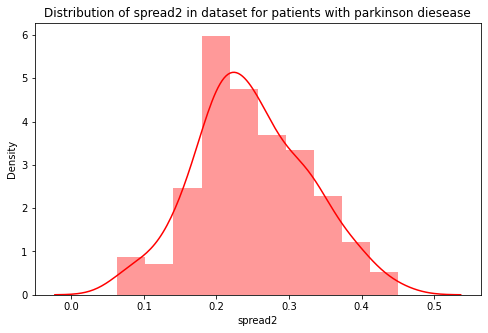

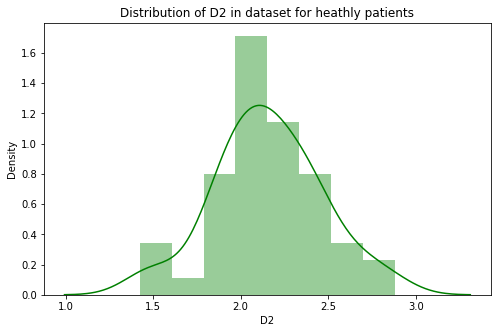

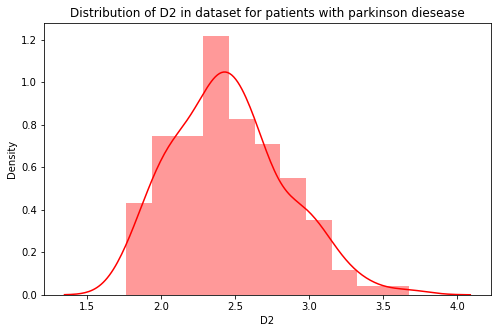

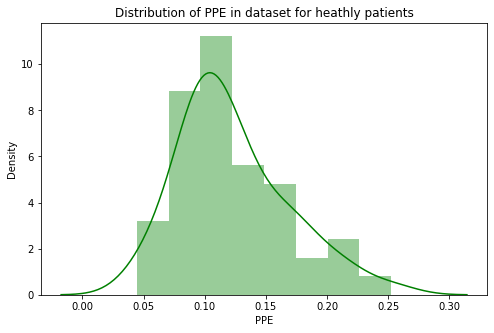

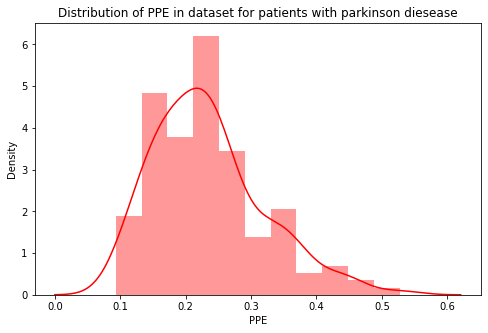

In [124]:
def continous_variable(series,color,title):
  plt.figure(figsize=(8,5))
  sns.distplot(series,color=color).set_title(title)


list_of_non_object_cols=df.loc[:,df.dtypes !='object'].columns.tolist()


for col in list_of_non_object_cols:
  continous_variable(df[df['status']==0][col],"green","Distribution of {} in dataset for heathly patients" .format(col)) 

  continous_variable(df[df['status']==1][col],"red","Distribution of {} in dataset for patients with parkinson diesease" .format(col))

# **Observation**



*   From the above set of graph we can observe that majority of our continous variable are skewed to the right and we cannot observe any perfect Normalally distributed continous variable  
*  This somehow provides a rough idea about that our dataset has some outliers



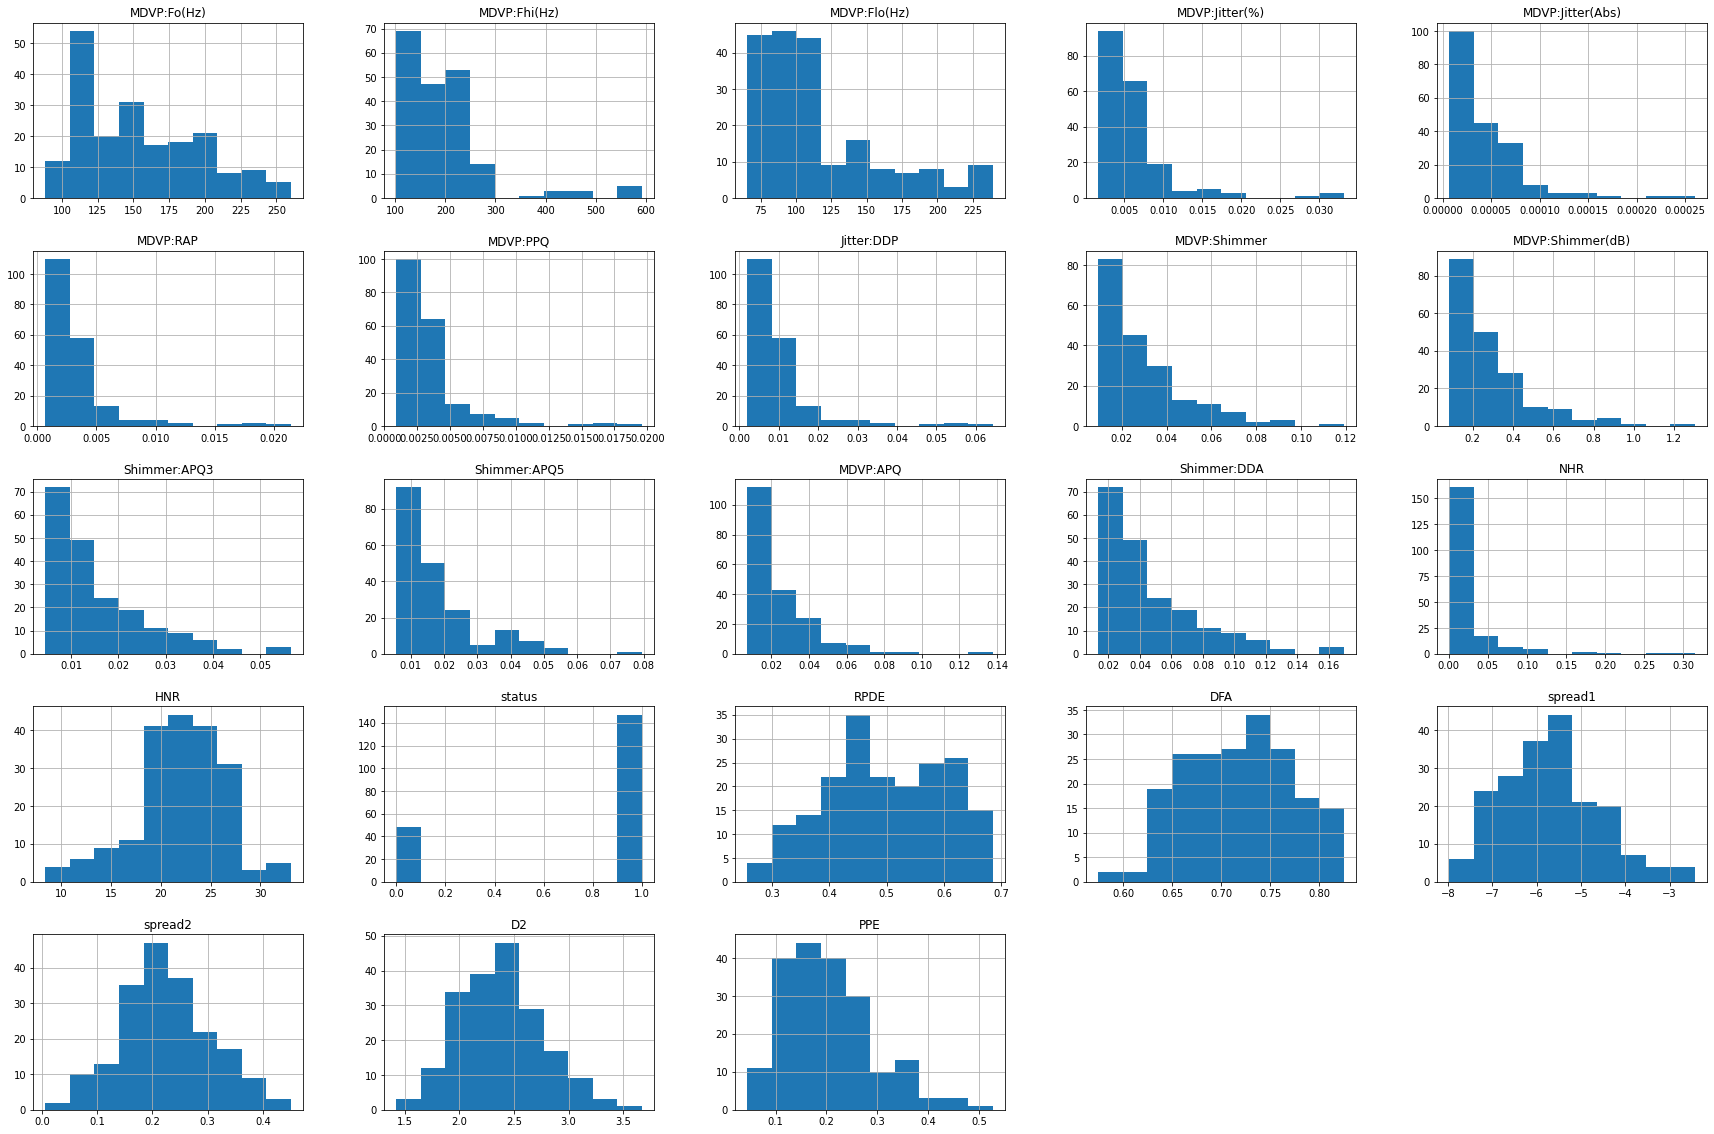

In [125]:
# Histogram for every feature 
df.hist(figsize=(30,20))
plt.show()

# **BiVariate Analysis**

# **Measuring correlation**

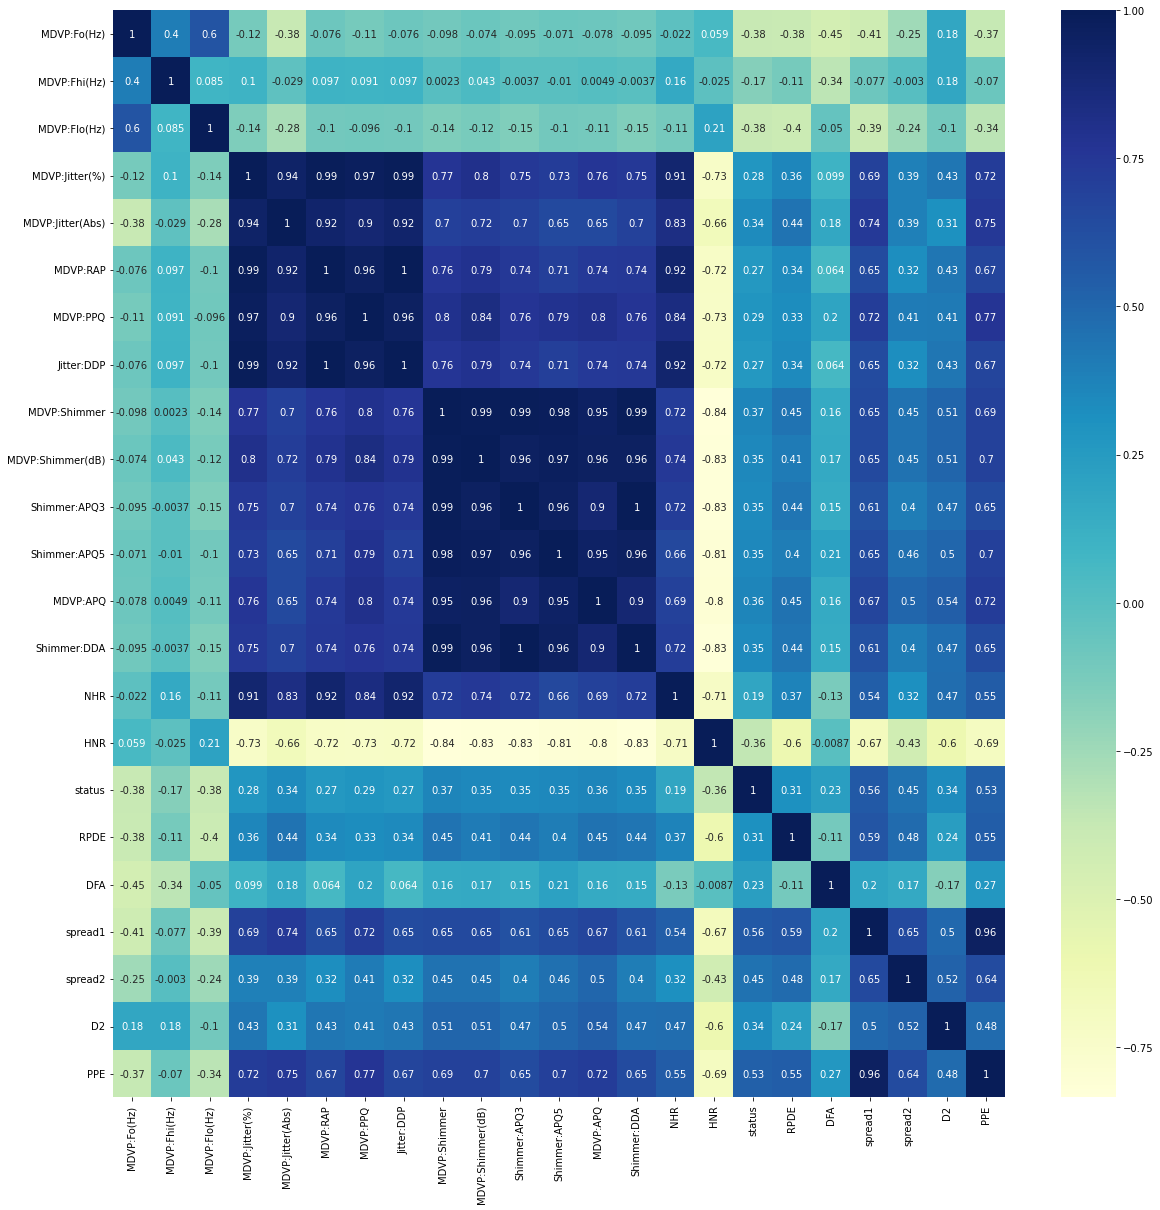

In [126]:
plt.figure(figsize=(20, 20))
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True, cmap='YlGnBu')
bottom, top = ax.get_ylim()

# **Outlier Detection**

## Now we will plot boxplot to obseve if our continous variables has any outlier or not

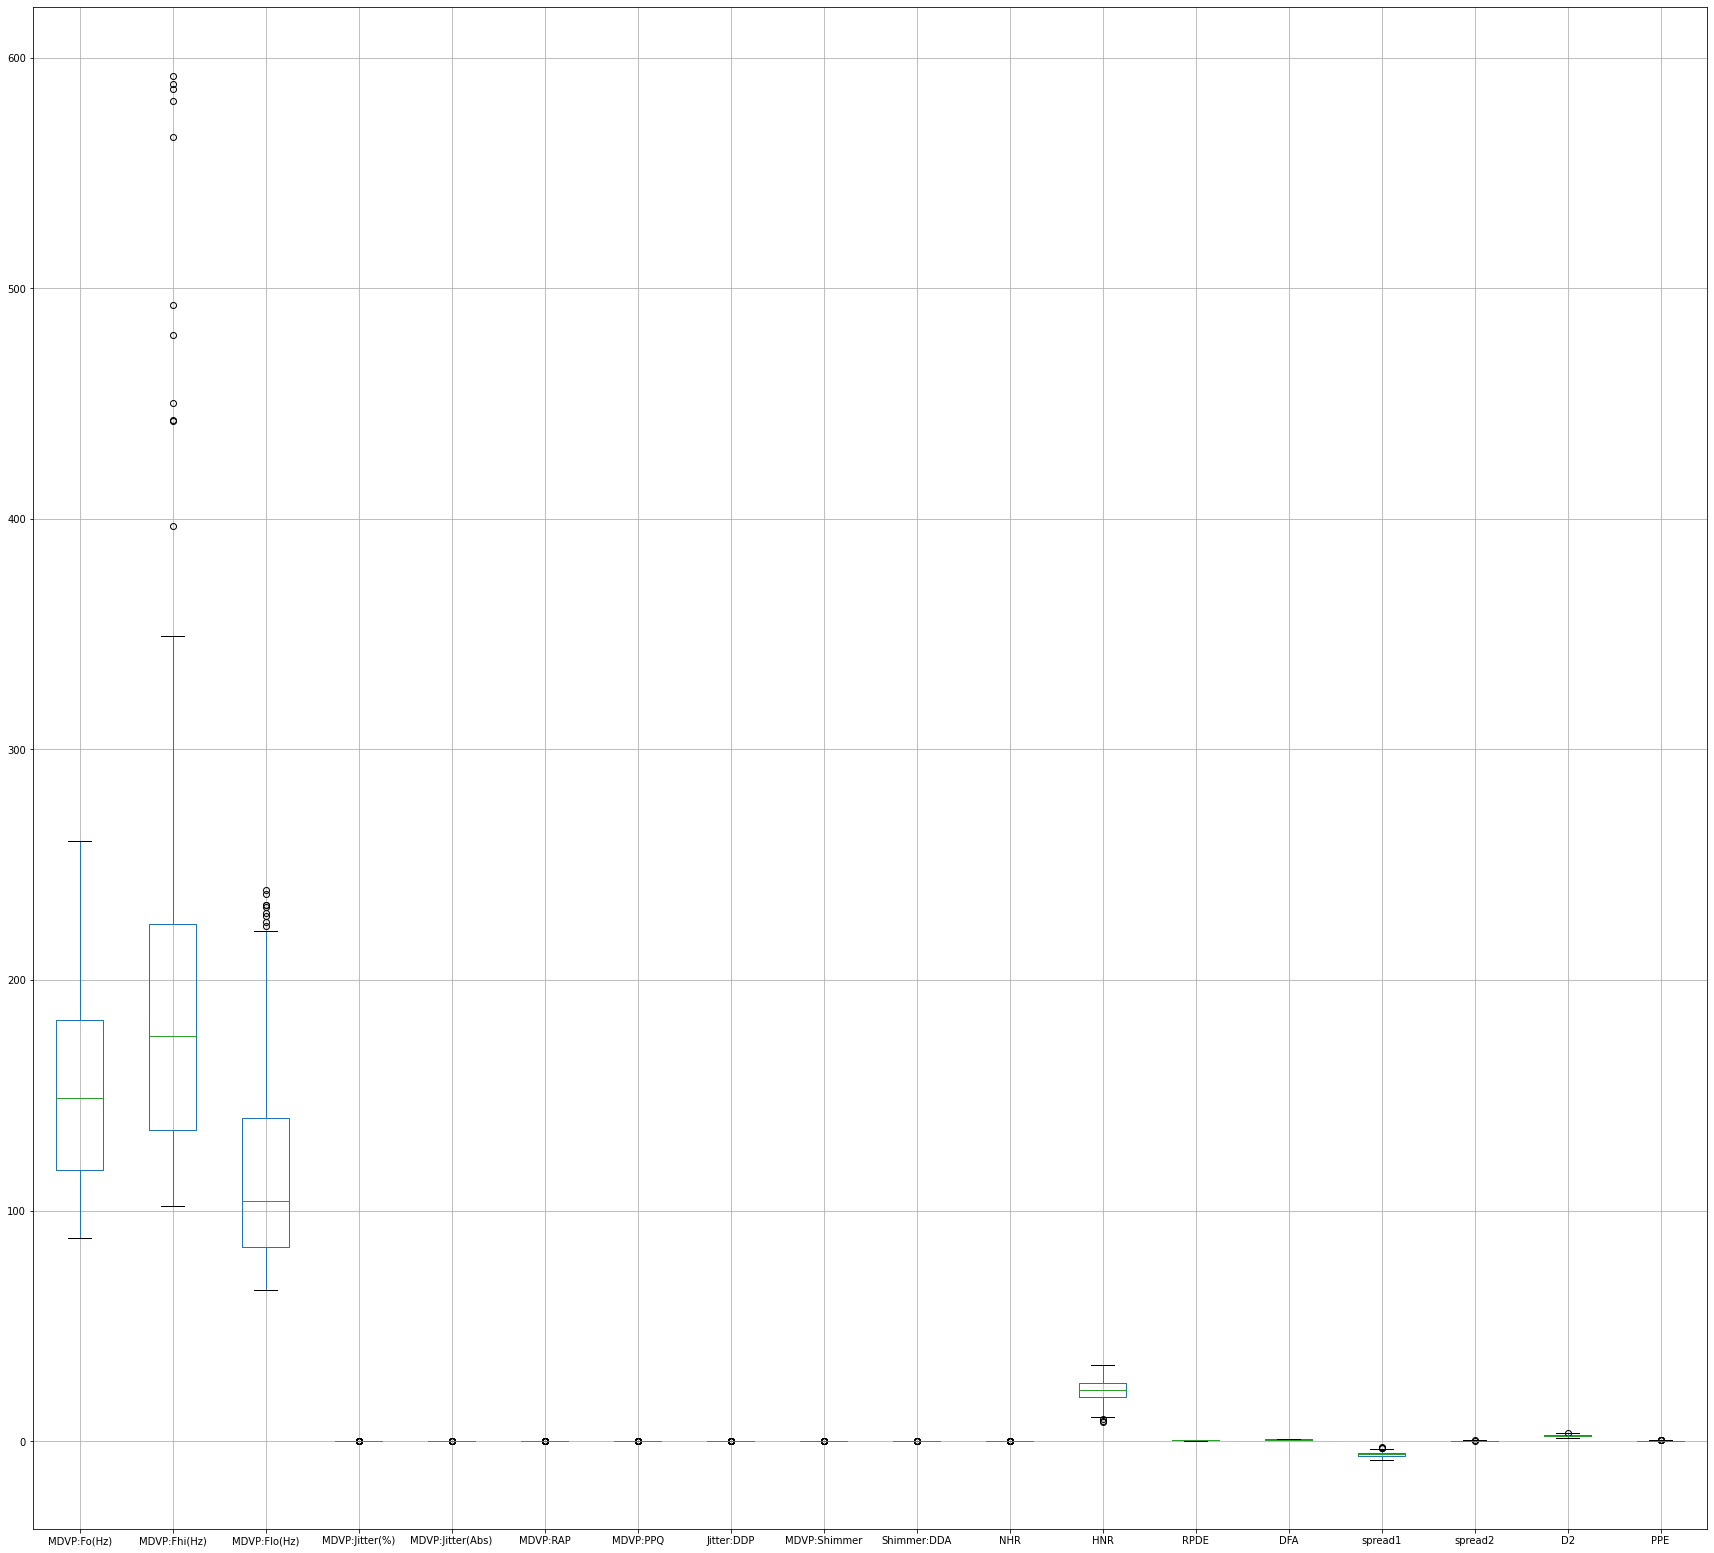

In [127]:
# Checking for the presence of outliers in numeric cols
plt.figure(figsize=(30,28))
df.boxplot(column=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1',	'spread2',	'D2',	'PPE'])  

## We can see  only 1st columns has no outlier apart from 1st column their are outliers in every columns 

# Handling Outlier

In [128]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)
    print("10percentile is ",tenth_percentile)
    print("90th percentile is ",ninetieth_percentile)


    b = np.where(data<tenth_percentile, tenth_percentile, data)
    print('checking the data is less then 10th percentile',b)
    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    print('checking the data is greater then 90th percentile',b1)
    return b1
    
    
for i in ['MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer','Shimmer:DDA','NHR','HNR','spread1',	'spread2',	'D2',	'PPE']:
    df[i]=handle_outliers(df[i])


10percentile is  125.25019999999999
90th percentile is  261.003
checking the data is less then 10th percentile [157.302  148.65   131.111  137.871  141.781  131.162  137.244  125.2502
 132.068  125.2502 125.2502 125.2502 159.866  179.139  163.305  217.455
 349.259  232.181  175.829  189.398  165.738  172.86   193.221  192.735
 200.841  206.002  208.313  208.701  227.383  198.346  206.896  209.512
 215.203  211.604  211.526  210.565  192.921  185.604  201.249  202.324
 197.724  196.537  247.326  248.834  250.912  255.034  262.09   261.487
 128.611  130.049  135.069  134.231  138.052  139.867  134.656  126.358
 131.067  129.916  131.897  271.314  237.494  238.987  231.345  234.619
 252.221  239.541  159.774  166.607  162.215  162.824  162.408  176.595
 139.71   588.518  128.101  125.2502 148.826  125.394  125.2502 125.2502
 125.2502 125.2502 125.2502 125.2502 205.56   200.125  202.45   227.381
 211.35   225.93   206.008  163.335  164.989  161.469  172.975  163.267
 168.913  143.946  140.

We used IQR method for handling outlier now we will check for outliers by plotting boxplot again

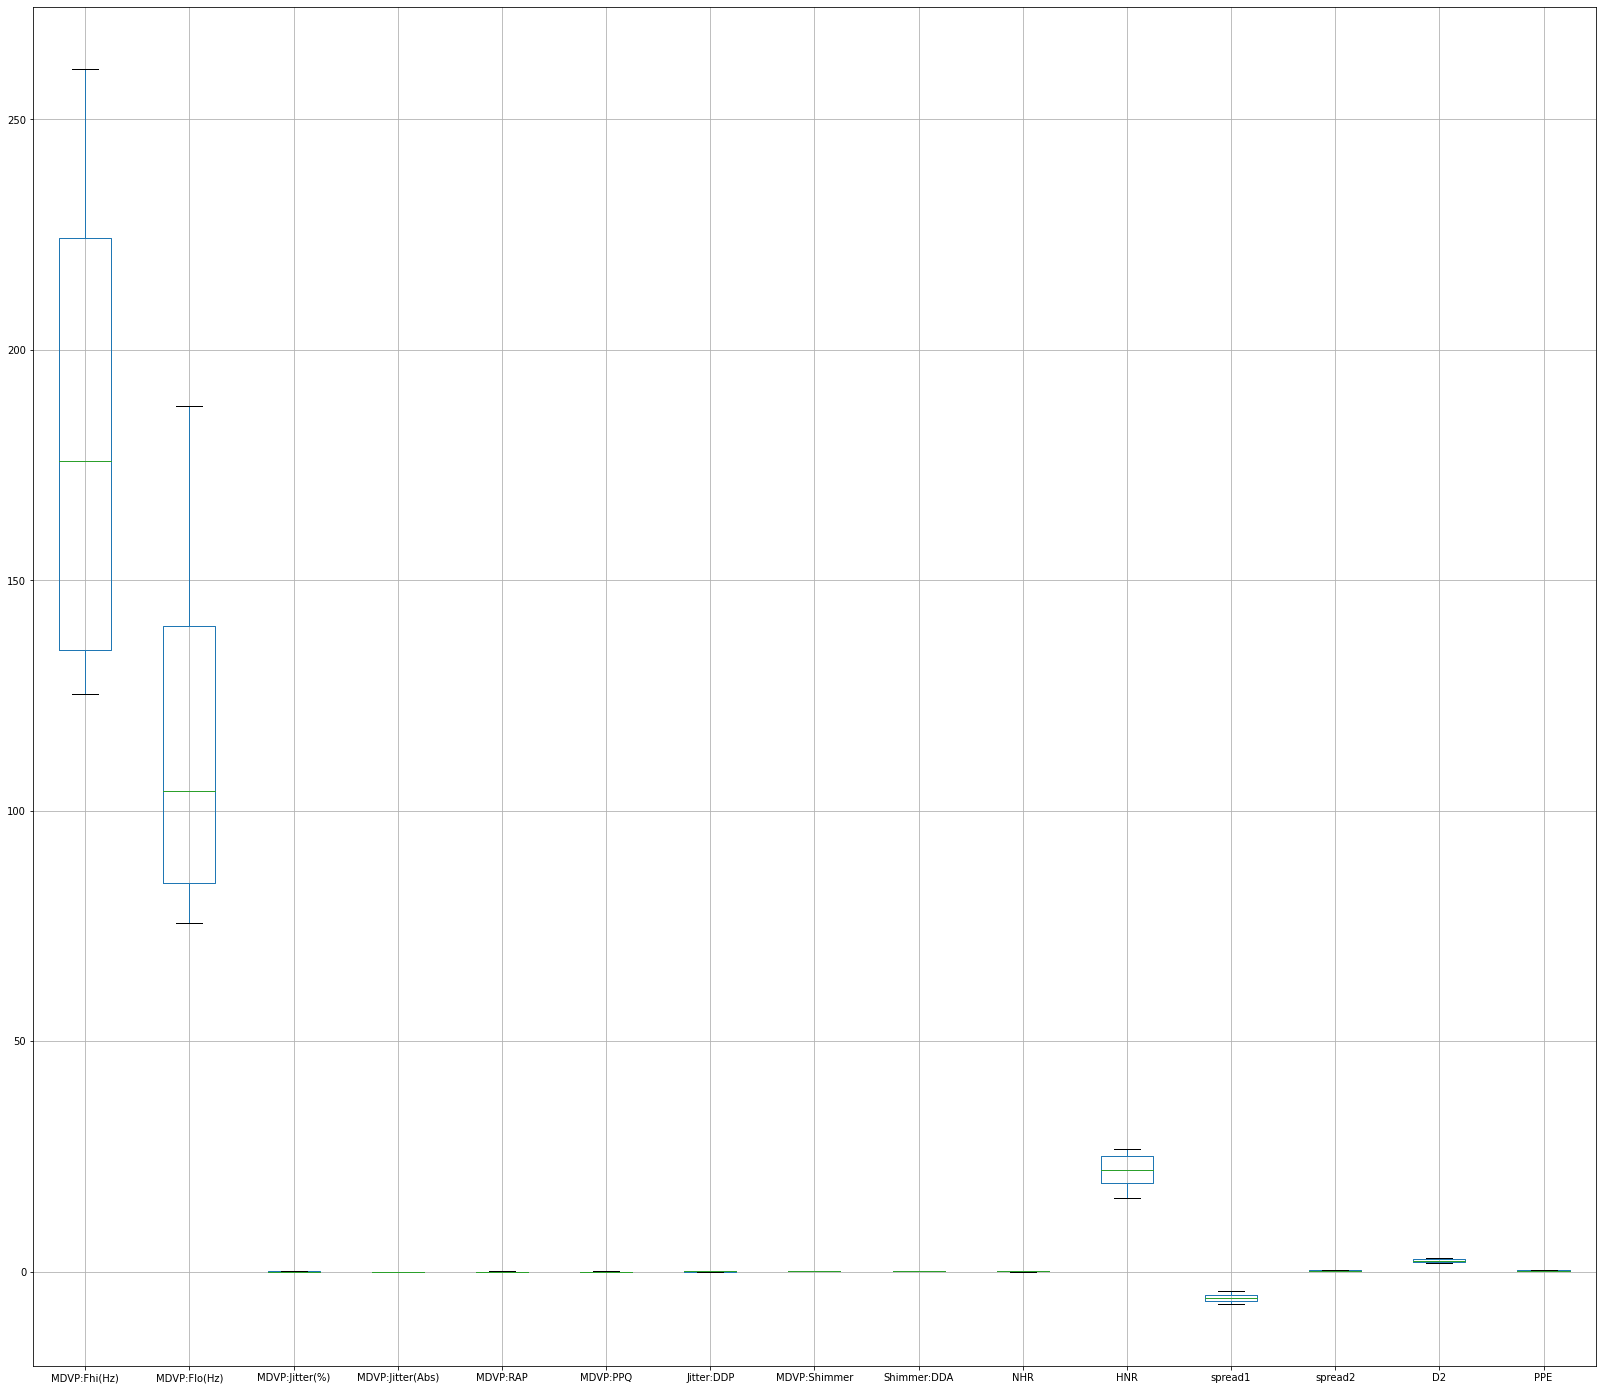

In [129]:
# verifying again with boxplot
plt.figure(figsize=(28,25))
df.boxplot(column=['MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer','Shimmer:DDA','NHR','HNR','spread1',	'spread2',	'D2',	'PPE'])  

## we can see in boxplot their are no outliers remain

# **Feature Scaling**

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scale = MinMaxScaler()

In [132]:
scale.fit_transform(df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer','Shimmer:DDA','NHR','HNR','spread1',	'spread2',	'D2',	'PPE']])

array([[0.18430827, 0.23610415, 0.        , ..., 0.66862933, 0.37733405,
        0.78704378],
       [0.19832685, 0.17237066, 0.34031705, ..., 0.98702249, 0.56330854,
        1.        ],
       [0.16503854, 0.04317259, 0.32014979, ..., 0.87452892, 0.41827465,
        0.99377731],
       ...,
       [0.50273036, 0.84532179, 0.        , ..., 0.17092002, 0.75680976,
        0.12812481],
       [0.6428929 , 1.        , 0.        , ..., 0.39667656, 0.21400693,
        0.09183657],
       [0.73327434, 0.99465204, 0.02100815, ..., 0.31933579, 0.63213835,
        0.20068836]])

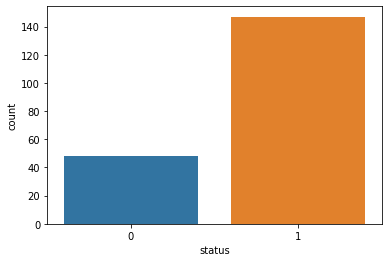

In [133]:
import seaborn as sns
sns.countplot(x='status',data=df )

### The data is imbalanced as around 45 people are healthy and 150 people with parkinson disease

### Now we will perform over sampling to balanced the dataset

In [134]:
## Get the Parkinson Patients and the normal people dataset 

parkinson = df[df['status']==1]

normal = df[df['status']==0]

In [135]:
print(parkinson.shape,normal.shape)

(147, 23) (48, 23)


In [155]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["status"]]
# Store the variable we are predicting 
target = "status"

X = df[columns] # Dependent variable
Y = df[target]  # Indepent variable


In [156]:
from imblearn.combine import SMOTETomek

In [157]:
# transform the dataset
oversample = SMOTETomek()
X_res, Y_res = oversample.fit_resample(X, Y)

In [158]:
X_res.shape,Y_res.shape

((288, 22), (288,))

In [159]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y.shape)))
print('Resampled dataset shape {}'.format(Counter(Y_res.shape)))


Original dataset shape Counter({195: 1})
Resampled dataset shape Counter({288: 1})


# **Classification models**

In [160]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn import svm # SVM
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.naive_bayes import GaussianNB #Naive Byes
from xgboost import XGBClassifier #Extreme Gradient Boost
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

Training the data for Decision Tree Classifier

In [161]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# **Decision Tree  Classifier**

In [164]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
dt_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

dt_precision = round(precision_score(y_test, y_pred)*100,2)
dt_recall = round(recall_score(y_test, y_pred)*100,2)
dt_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[11  4]
 [ 3 41]]

Accuracy: 88.14 %

Precision:  91.11 %

Recall:  93.18 %

F1 Score: 92.13 %


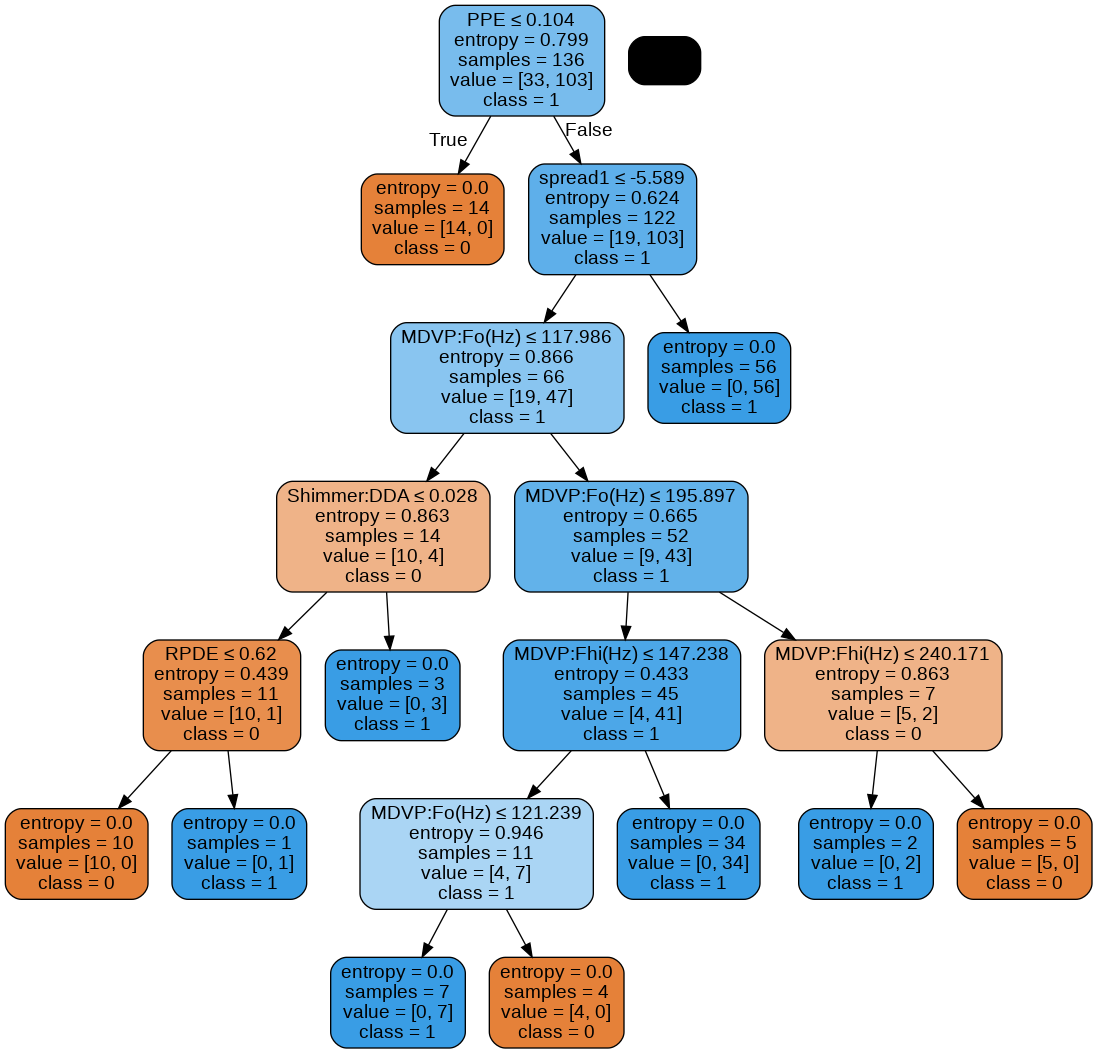

In [163]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('parkinson.png')
Image(graph.create_png())

# **Logistic Regression**

In [165]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
lr_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

lr_precision = round(precision_score(y_test, y_pred)*100,2)
lr_recall = round(recall_score(y_test, y_pred)*100,2)
lr_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[ 9  6]
 [ 2 42]]

Accuracy: 88.14 %

Precision:  91.11 %

Recall:  93.18 %

F1 Score: 92.13 %


# **SVM classifier**

In [166]:
clf = svm.SVC()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
svm_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

svm_precision = round(precision_score(y_test, y_pred)*100,2)
svm_recall = round(recall_score(y_test, y_pred)*100,2)
svm_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[ 4 11]
 [ 0 44]]

Accuracy: 88.14 %

Precision:  91.11 %

Recall:  93.18 %

F1 Score: 92.13 %


# **KNeighborsClassifier**

In [167]:
clf = KNeighborsClassifier(n_neighbors=5) 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
knn_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

knn_precision = round(precision_score(y_test, y_pred)*100,2)
knn_recall = round(recall_score(y_test, y_pred)*100,2)
knn_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[ 8  7]
 [ 3 41]]

Accuracy: 88.14 %

Precision:  91.11 %

Recall:  93.18 %

F1 Score: 92.13 %


# **Random Forest Classifier**

In [168]:
clf=RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
rf_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

rf_precision = round(precision_score(y_test, y_pred)*100,2)
rf_recall = round(recall_score(y_test, y_pred)*100,2)
rf_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[11  4]
 [ 0 44]]

Accuracy: 88.14 %

Precision:  91.11 %

Recall:  93.18 %

F1 Score: 92.13 %


# **Naive Byes**

In [169]:
clf = GaussianNB() # Naive Byes 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
nb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

nb_precision = round(precision_score(y_test, y_pred)*100,2)
nb_recall = round(recall_score(y_test, y_pred)*100,2)
nb_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[11  4]
 [ 8 36]]

Accuracy: 88.14 %

Precision:  91.11 %

Recall:  93.18 %

F1 Score: 92.13 %


# **XGBoost**

In [170]:
# XGBoost

clf=XGBClassifier(n_estimators=30)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',c_matrix)

# Accuracy
xgb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",xgb_accuracy,'%')

xgb_precision = round(precision_score(y_test, y_pred)*100,2)
xgb_recall = round(recall_score(y_test, y_pred)*100,2)
xgb_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',xgb_precision,'%')
print('\nRecall: ',xgb_recall,'%')
print('\nF1 Score:',xgb_fScore,'%')



Confusion matrix:
 [[10  5]
 [ 0 44]]

Accuracy: 91.53 %

Precision:  89.8 %

Recall:  100.0 %

F1 Score: 94.62 %


# **Model Evaluation**

In [171]:
model_ev = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'],
                    'Accuracy %':[lr_accuracy,nb_accuracy,rf_accuracy,xgb_accuracy,knn_accuracy,dt_accuracy,svm_accuracy],
                    'Precision %':[lr_precision,nb_precision,rf_precision,xgb_precision,knn_precision,dt_precision,svm_precision],
                    'Recall %':[lr_recall,nb_recall,rf_recall,xgb_recall,knn_recall,dt_recall,svm_recall],
                    'F1 Score %':[lr_fScore,nb_fScore,rf_fScore,xgb_fScore,knn_fScore,dt_fScore,svm_fScore]})

model_ev.sort_values(by='Accuracy %',ignore_index=True,inplace=True)
model_ev

,Model,Accuracy %,Precision %,Recall %,F1 Score %
0,Naive Bayes,79.66,90.00,81.82,85.71
1,Support Vector Machine,81.36,80.00,100.00,88.89
2,K-Nearest Neighbour,83.05,85.42,93.18,89.13
3,Logistic Regression,86.44,87.50,95.45,91.30
4,Decision Tree,88.14,91.11,93.18,92.13
5,Extreme Gradient Boost,91.53,89.80,100.00,94.62
6,Random Forest,93.22,91.67,100.00,95.65


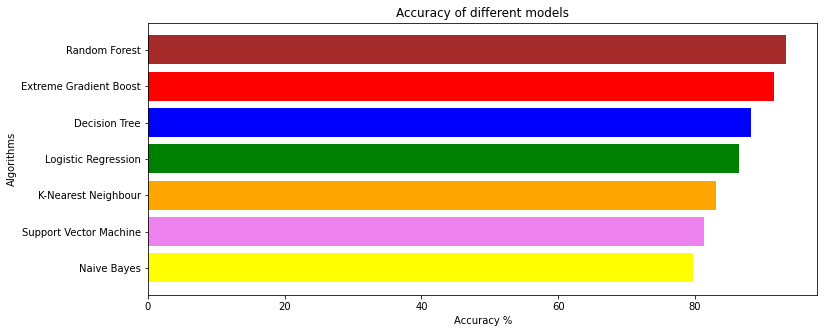

In [172]:
# Barplot for Accuracy of different models

plt.figure(figsize=(12,5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_ev['Model'],model_ev['Accuracy %'],color=['yellow','violet','orange','green','blue','red','brown'])
plt.show()

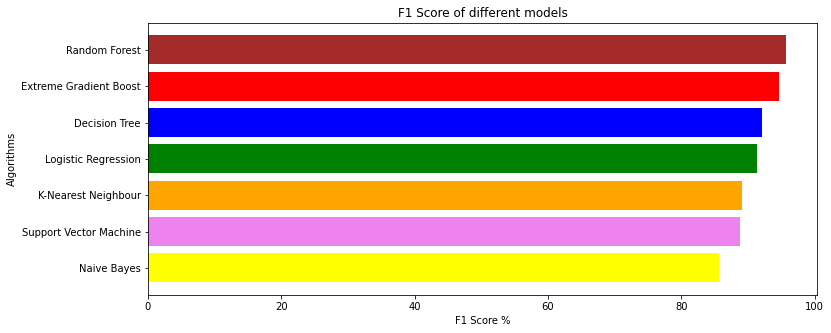

In [173]:
# Barplot for F1 Score of different models

model_fs=model_ev.sort_values(by='F1 Score %',ignore_index=True)
plt.figure(figsize=(12,5))
plt.title("F1 Score of different models")
plt.xlabel("F1 Score %")
plt.ylabel("Algorithms")
plt.barh(model_fs['Model'],model_fs['F1 Score %'],color=['yellow','violet','orange','green','blue','red','brown'])
plt.show()


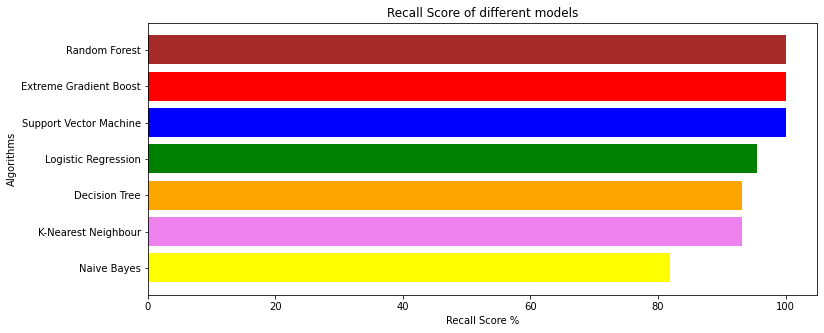

In [174]:
# Barplot for Recall Score of different models

model_rc=model_ev.sort_values(by='Recall %',ignore_index=True)
plt.figure(figsize=(12,5))
plt.title("Recall Score of different models")
plt.xlabel("Recall Score %")
plt.ylabel("Algorithms")
plt.barh(model_rc['Model'],model_rc['Recall %'],color=['yellow','violet','orange','green','blue','red','brown'])
plt.show()

**Conclusion**

Here Recall is the appropriate factor to describe the model performance 
The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected

we can see that Random Forest is getting the highest recall for our model